## Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import Dataset

In [3]:
dataset = Dataset()

In [4]:
df, coeff_vector = dataset.create_dataframe(100)

In [5]:
df.head()

,x1,x2,bias,y
0,0.653668,-0.655866,1.0,-1.0
1,0.131913,-0.921752,1.0,-1.0
2,-0.039300,-0.168484,1.0,-1.0
3,0.526699,0.258979,1.0,1.0
4,0.604481,-0.662859,1.0,-1.0


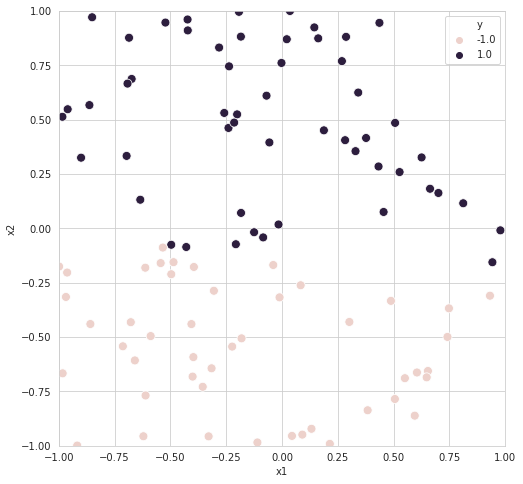

In [6]:
dataset.plot_data(df)

---

## Perceptron

In [7]:
from perceptron import Perceptron

In [8]:
perceptron = Perceptron()

In [9]:
RUNS = 1000

results = perceptron.run_epoch(RUNS, 10)

results_df = dataset.generate_results_dataframe(results, ['iterations', 'misclassified_rate'])
results_df.mean(axis=0)

iterations            9.444000
misclassified_rate    0.109829
dtype: float64

In [10]:
RUNS = 1000

results = perceptron.run_epoch(RUNS, 100)

results_df = dataset.generate_results_dataframe(results, ['iterations', 'misclassified_rate'])
results_df.mean(axis=0)

iterations            102.181000
misclassified_rate      0.012906
dtype: float64

---

## Regressão Linear

In [11]:
from datasets import Dataset
from linear_regression import LinearRegression

In [12]:
dataset = Dataset()
lr = LinearRegression()

In [13]:
RUNS = 1000

results = lr.run_epoch(RUNS, 100, dataset)
results_df = dataset.generate_results_dataframe(results, ['E_in', 'E_out'])
results_df.mean(axis=0)

E_in     0.038920
E_out    0.047729
dtype: float64

---

## Regressão Linear + Perceptron

In [14]:
from linear_regression import LinearRegressionPerceptron

In [15]:
lr_perceptron = LinearRegressionPerceptron()

In [16]:
RUNS = 1000

results = lr_perceptron.run_epoch(RUNS, 10, dataset, test=False)
results_df = dataset.generate_results_dataframe(results, ['iterations'])
results_df.mean(axis=0)

iterations    4.963
dtype: float64

---

## Regressão Linear com Noise Target

In [17]:
from datasets import DatasetNoiseTarget

noise_target = DatasetNoiseTarget()

In [18]:
RUNS = 1000

results = lr.run_epoch(RUNS, 1000, noise_target, test=False)
results_df = noise_target.generate_results_dataframe(results, ['E_in'])
results_df.mean(axis=0)

E_in    0.505548
dtype: float64

---

## Regressão com entradas não-lineares

In [19]:
from linear_regression import NonLinearRegression
from datasets import NonLinearDataset

nlr = NonLinearRegression()
nl_dataset = NonLinearDataset()

In [20]:
RUNS = 10

results = nlr.run_epoch(RUNS, 1000, nl_dataset)

disagreements = [result[0] for result in results]
E_outs = [result[1] for result in results]

In [21]:
disagreements_df = nl_dataset.generate_results_dataframe(disagreements, ['disag_a', 'disag_b', 'disag_c', 'disag_d', 'disag_e'])
disagreements_df.mean(axis=0)

disag_a    0.0413
disag_b    0.3352
disag_c    0.3267
disag_d    0.3730
disag_e    0.4518
dtype: float64

In [22]:
E_out_df = nl_dataset.generate_results_dataframe(E_outs, ['E_out'])
E_out_df.mean(axis=0)

E_out    0.1258
dtype: float64

---

## Gradiente Descendente

In [23]:
!python gradient_descent.py

Iniciando experimentos 11 e 12a
----
iteração: 0 --> E(u, v) = 3.9303972318771003
iteração: 1 --> E(u, v) = 1.1595097299694377
iteração: 2 --> E(u, v) = 1.0074074829626989
iteração: 3 --> E(u, v) = 0.09900912162725588
iteração: 4 --> E(u, v) = 0.00866064536281213
iteração: 5 --> E(u, v) = 0.00018175579172801659
iteração: 6 --> E(u, v) = 1.2972398478441872e-06
iteração: 7 --> E(u, v) = 7.291524698457968e-09
iteração: 8 --> E(u, v) = 4.0099978905617125e-11
iteração: 9 --> E(u, v) = 2.2016834484097367e-13
iteração: 10 --> E(u, v) = 1.2086833944220747e-15
Ponto encontrado: [0.04473628 0.02395873]
Ponto mais próximo: [0.045, 0.024]
----------------------------------------
Iniciando experimento 12b
----
Vetor final obtido pela coordenada descendente: [ 6.2970759  -2.85230695]
E(u, v) obtido pela coordenada descendente: 0.13981379199615315


---

## Regressão Logística

In [24]:
from logistic_regression import LogisticRegression
from datasets import Dataset

In [25]:
log_reg = LogisticRegression(0.01)
dataset = Dataset()

In [26]:
RUNS = 100

results = log_reg.run_epoch(RUNS, 100, dataset)
results_df = dataset.generate_results_dataframe(results, ['iterations', 'E_out'])
results_df.mean(axis=0)

iterations    341.63000
E_out           0.10179
dtype: float64